In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import plot_model

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data = pd.concat([train, test]).reset_index(drop = True)

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data.iloc[:, 1:-3] = scaler.fit_transform(data.iloc[:, 1:-3])

In [4]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['week'] = data['date_time'].dt.week
data['day'] = data['date_time'].dt.day
data['dayofweek'] = data['date_time'].dt.dayofweek
data['time'] = data['date_time'].dt.date - data['date_time'].dt.date.min()
data['hour'] = data['date_time'].dt.hour
data['time'] = data['time'].apply(lambda x : x.days)
data.drop(columns = 'date_time', inplace = True)

In [5]:
data['dayofweek'] = data['dayofweek'].astype(object)
data = pd.get_dummies(data)

In [6]:
training_whole = data[:len(train)]
testing_data = data[len(train):]

In [7]:
from sklearn.model_selection import train_test_split

training_data, val_data = train_test_split(training_whole, test_size=0.2)

In [8]:
y_train = training_data[['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]
y_val = val_data[['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides']]

x_train = training_data.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
y_train_c = training_data[['target_carbon_monoxide']].values.ravel()
y_train_b = training_data[['target_benzene']].values.ravel()
y_train_n = training_data[['target_nitrogen_oxides']].values.ravel()

x_val = val_data.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
y_val_c = val_data[['target_carbon_monoxide']].values.ravel()
y_val_b = val_data[['target_benzene']].values.ravel()
y_val_n = val_data[['target_nitrogen_oxides']].values.ravel()

x_test = testing_data.drop(columns = ['target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])

In [9]:
x_train_val = pd.concat([x_train, x_val]).reset_index(drop = True)
y_train_val = pd.concat([y_train, y_val]).reset_index(drop = True)
y_train_val_c = y_train_val[['target_carbon_monoxide']].values.ravel()
y_train_val_b = y_train_val[['target_benzene']].values.ravel()
y_train_val_n = y_train_val[['target_nitrogen_oxides']].values.ravel()

## RandomForest

In [9]:
from sklearn.ensemble import RandomForestRegressor
forest_reg_c = RandomForestRegressor()
forest_reg_b = RandomForestRegressor()
forest_reg_n = RandomForestRegressor()
forest_reg_c.fit(x_train, y_train_c)
forest_reg_b.fit(x_train, y_train_b)
forest_reg_n.fit(x_train, y_train_n)

RandomForestRegressor()

In [10]:
forest_predict_c = forest_reg_c.predict(x_val)
forest_predict_b = forest_reg_b.predict(x_val)
forest_predict_n = forest_reg_n.predict(x_val)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# predicting the accuracy score

forest_score_c = r2_score(y_val_c, forest_predict_c)
forest_mse_c = mean_squared_error(y_val_c, forest_predict_c)
forest_rmse_c = np.sqrt(forest_mse_c)

forest_score_b = r2_score(y_val_b, forest_predict_b)
forest_mse_b = mean_squared_error(y_val_b, forest_predict_b)
forest_rmse_b = np.sqrt(forest_mse_b)

forest_score_n = r2_score(y_val_n, forest_predict_n)
forest_mse_n = mean_squared_error(y_val_n, forest_predict_n)
forest_rmse_n = np.sqrt(forest_mse_n)

print(forest_score_c, forest_mse_c, forest_rmse_c)
print(forest_score_b, forest_mse_b, forest_rmse_b)
print(forest_score_n, forest_mse_n, forest_rmse_n)
print('Total mse loss: ', (forest_mse_c + forest_mse_b + forest_mse_n))

NameError: name 'forest_predict_c' is not defined

## SVG (SHIT)

In [12]:
from sklearn.svm import SVR
svr_reg_c = SVR()
svr_reg_b = SVR()
svr_reg_n = SVR()
svr_reg_c.fit(x_train, y_train_c)
svr_reg_b.fit(x_train, y_train_b)
svr_reg_n.fit(x_train, y_train_n)

SVR()

In [13]:
svr_predict_c = svr_reg_c.predict(x_val)
svr_predict_b = svr_reg_b.predict(x_val)
svr_predict_n = svr_reg_n.predict(x_val)

In [14]:
svr_score_c = r2_score(y_val_c, svr_predict_c)
svr_mse_c = mean_squared_error(y_val_c, svr_predict_c)
svr_rmse_c = np.sqrt(svr_mse_c)

svr_score_b = r2_score(y_val_b, svr_predict_b)
svr_mse_b = mean_squared_error(y_val_b, svr_predict_b)
svr_rmse_b = np.sqrt(svr_mse_b)

svr_score_n = r2_score(y_val_n, svr_predict_n)
svr_mse_n = mean_squared_error(y_val_n, svr_predict_n)
svr_rmse_n = np.sqrt(svr_mse_n)

print(svr_score_c, svr_mse_c, svr_rmse_c)
print(svr_score_b, svr_mse_b, svr_rmse_b)
print(svr_score_n, svr_mse_n, svr_rmse_n)

-0.011202563810527533 1.8618002554163302 1.3644780157321443
-0.041139593139713604 56.36603421721851 7.507731629275151
-0.046540589845639246 32513.746346538912 180.31568524823044


# Logistic Regression

In [15]:
from sklearn.linear_model import LinearRegression

lr_reg_c = LinearRegression()
lr_reg_b = LinearRegression()
lr_reg_n = LinearRegression()
lr_reg_c.fit(x_train, y_train_c)
lr_reg_b.fit(x_train, y_train_b)
lr_reg_n.fit(x_train, y_train_n)

LinearRegression()

In [16]:
lr_predict_c = lr_reg_c.predict(x_val)
lr_predict_b = lr_reg_b.predict(x_val)
lr_predict_n = lr_reg_n.predict(x_val)

In [17]:
lr_score_c = r2_score(y_val_c, lr_predict_c)
lr_mse_c = mean_squared_error(y_val_c, lr_predict_c)
lr_rmse_c = np.sqrt(lr_mse_c)

lr_score_b = r2_score(y_val_b, lr_predict_b)
lr_mse_b = mean_squared_error(y_val_b, lr_predict_b)
lr_rmse_b = np.sqrt(lr_mse_b)

lr_score_n = r2_score(y_val_n, lr_predict_n)
lr_mse_n = mean_squared_error(y_val_n, lr_predict_n)
lr_rmse_n = np.sqrt(lr_mse_n)

print(lr_score_c, lr_mse_c, lr_rmse_c)
print(lr_score_b, lr_mse_b, lr_rmse_b)
print(lr_score_n, lr_mse_n, lr_rmse_n)

0.8479600318959966 0.2799320943005083 0.5290860934673187
0.9582286452216081 2.2614504608724992 1.5038119765690454
0.7606720183949367 7435.401324170227 86.22877318024551


# Ensemble

In [18]:
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
log_clf = LinearRegression()
rnd_clf = RandomForestRegressor()
voting_clf = VotingRegressor(
    estimators=[('lr', log_clf), ('rf', rnd_clf)])
voting_clf.fit(x_train, y_train_c)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor())])

In [19]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(x_train, y_train_c)
    y_pred = clf.predict(x_val)
    print(clf.__class__.__name__, r2_score(y_val_c, y_pred))

LinearRegression 0.8479600318959966
RandomForestRegressor 0.9070168720144484
VotingRegressor 0.8956113874722837


## Neural Network

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

model = Sequential([
    Dense(32, activation="relu", input_shape=(x_train.shape[1],)),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(3)
])

checkpoint_cb = ModelCheckpoint(
    'models/nn.h5',
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False
)

model.compile(loss="mean_squared_error", optimizer="adam")
history = model.fit(x_train, y_train, epochs=500, callbacks=[checkpoint_cb],
    validation_data=(x_val, y_val))

#mse_test = model.evaluate(x_val, y_val)

Epoch 1/500
178/178 [==============================] - 1s 6ms/step - loss: 11495.8594 - val_loss: 7485.1997
Epoch 2/500
178/178 [==============================] - 1s 4ms/step - loss: 9506.3203 - val_loss: 7118.6899
Epoch 3/500
178/178 [==============================] - 1s 4ms/step - loss: 9381.1094 - val_loss: 7158.2412
Epoch 4/500
178/178 [==============================] - 1s 5ms/step - loss: 8650.3984 - val_loss: 6906.9600
Epoch 5/500
178/178 [==============================] - 1s 4ms/step - loss: 8543.0117 - val_loss: 6673.5728
Epoch 6/500
178/178 [==============================] - 1s 4ms/step - loss: 8415.5361 - val_loss: 7167.6587
Epoch 7/500
178/178 [==============================] - 1s 4ms/step - loss: 8209.5293 - val_loss: 6708.4736
Epoch 8/500
178/178 [==============================] - 1s 4ms/step - loss: 8070.0444 - val_loss: 6705.4141
Epoch 9/500
178/178 [==============================] - 1s 4ms/step - loss: 7775.3057 - val_loss: 7278.6816
Epoch 10/500
178/178 [==============

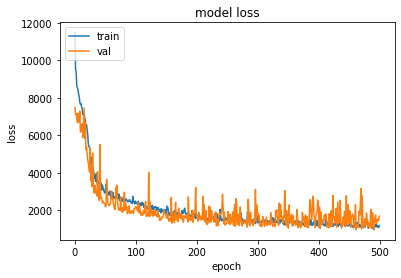

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
y_pred_nn = model.predict(x_val)

r2_score(y_val, y_pred_nn)

0.8008397862969695

## XGBoost

In [18]:
x_train_val = pd.concat([x_train, x_val]).reset_index(drop = True)
y_train_val = pd.concat([y_train, y_val]).reset_index(drop = True)
y_train_val_c = y_train_val[['target_carbon_monoxide']].values.ravel()
y_train_val_b = y_train_val[['target_benzene']].values.ravel()
y_train_val_n = y_train_val[['target_nitrogen_oxides']].values.ravel()

In [59]:
import xgboost as xg
from sklearn.metrics import r2_score

# Instantiation
xgb_c = xg.XGBRegressor()
xgb_b = xg.XGBRegressor()
xgb_n = xg.XGBRegressor()
  
# Fitting the model
xgb_c.fit(x_train, y_train_c)
xgb_b.fit(x_train, y_train_b)
xgb_n.fit(x_train, y_train_n)
  
# Predict the model
xgb_pred_c = xgb_c.predict(x_val)
xgb_pred_b = xgb_b.predict(x_val)
xgb_pred_n = xgb_n.predict(x_val)
     
score_xgb_c = r2_score(y_val_c, xgb_pred_c)
score_xgb_b = r2_score(y_val_b, xgb_pred_b)
score_xgb_n = r2_score(y_val_n, xgb_pred_n)
print(score_xgb_c, score_xgb_b, score_xgb_n)

0.9119848827237025 0.9803570927336498 0.9170091620813846


In [21]:
xgb_all_c = xg.XGBRegressor()
xgb_all_b = xg.XGBRegressor()
xgb_all_n = xg.XGBRegressor()

xgb_all_c.fit(x_train_val, y_train_val_c)
xgb_all_b.fit(x_train_val, y_train_val_b)
xgb_all_n.fit(x_train_val, y_train_val_n)

xbg_pred_all_c = xgb_all_c.predict(x_test)
xbg_pred_all_b = xgb_all_b.predict(x_test)
xbg_pred_all_n = xgb_all_n.predict(x_test)

In [45]:
final = pd.DataFrame(np.column_stack([np.array(test.iloc[:, 0]), xbg_pred_all_c, xbg_pred_all_b, xbg_pred_all_n]), columns=['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])

In [47]:
final.index += 1 

In [49]:
final.to_csv('XGBoost.csv', index = False)

## K-Fold Cross Validation XGBoost

In [4]:
train.shape

(7111, 12)

In [17]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = xgboost.XGBRegressor()
kfold = KFold(n_splits=10, random_state=None)
results = cross_val_score(model, x_train, y_train_c, scoring='r2',cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 93.43% (0.84%)


In [38]:
len(x_train)

5688

In [29]:
x_train_series = training_data.drop(columns = ['target_carbon_monoxide', 'target_benzene']).sort_index()

In [41]:
x_train_series = x_train_series.drop(columns=['target_nitrogen_oxides']).assign(target_nitrogen_oxides=x_train_series['target_nitrogen_oxides'])

C:\Users\JuanScanlan\miniconda3\lib\site-packages\xgboost\data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=207.0, predicted=177.8
>expected=192.8, predicted=197.8
>expected=207.6, predicted=237.8
>expected=190.0, predicted=211.2
>expected=199.4, predicted=230.1
>expected=206.1, predicted=208.3
>expected=211.0, predicted=203.2
>expected=191.1, predicted=262.4
>expected=221.3, predicted=164.1
>expected=227.4, predicted=277.8
>expected=199.8, predicted=217.3
>expected=186.5, predicted=298.7
MAE: 36.243


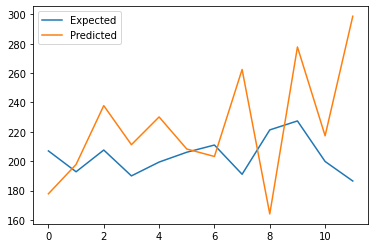

In [44]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=22, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
#     print(trainX)
#     print(trainy)
#     print()
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions
 

# transform the time series data into supervised learning
x_series = series_to_supervised(x_train_series, n_in=22)
# evaluate
mae, y, yhat = walk_forward_validation(x_series, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
# load the dataset
series = read_csv('daily-total-female-births.csv', header=0, index_col=0)
values = series.values
# transform the time series data into supervised learning
train = series_to_supervised(values, n_in=6)
# split into input and output columns
trainX, trainy = train[:, :-1], train[:, -1]
# fit model
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(trainX, trainy)
# construct an input for a new preduction
row = values[-6:].flatten()
# make a one-step prediction
yhat = model.predict(asarray([row]))
print('Input: %s, Predicted: %.3f' % (row, yhat[0]))

In [10]:
import xgboost as xg
from sklearn.model_selection import RandomizedSearchCV

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
rscv_xb_c = xg.XGBRegressor(seed = 20)
clf_c = RandomizedSearchCV(estimator=rscv_xb_c,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=50,
                         verbose=1)
# clf_c.fit(x_train, y_train_c)
clf_c.fit(x_train_val, y_train_val_c)
print("Best parameters:", clf_c.best_params_)
print("Lowest RMSE: ", (-clf_c.best_score_)**(1/2.0))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8999999999999999, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.3512971931011818


In [11]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
rscv_xb_b = xg.XGBRegressor(seed = 20)
clf_b = RandomizedSearchCV(estimator=rscv_xb_b,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=50,
                         verbose=1)
# clf_b.fit(x_train, y_train_b)
clf_b.fit(x_train_val, y_train_val_b)
print("Best parameters:", clf_b.best_params_)
print("Lowest RMSE: ", (-clf_b.best_score_)**(1/2.0))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5}
Lowest RMSE:  1.1346861281592635


In [12]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}
rscv_xb_n = xg.XGBRegressor(seed = 20)
clf_n = RandomizedSearchCV(estimator=rscv_xb_n,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=50,
                         verbose=1)
# clf_n.fit(x_train, y_train_n)
clf_n.fit(x_train_val, y_train_val_n)
print("Best parameters:", clf_n.best_params_)
print("Lowest RMSE: ", (-clf_n.best_score_)**(1/2.0))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.4}
Lowest RMSE:  48.86540636404576


In [16]:
from sklearn.metrics import r2_score

rscv_xb_pred_c = clf_c.predict(x_test)
#score_rscv_xb_c = r2_score(y_val_c, rscv_xb_pred_c)

rscv_xb_pred_b = clf_b.predict(x_test)
#score_rscv_xb_b = r2_score(y_val_b, rscv_xb_pred_b)

rscv_xb_pred_n = clf_n.predict(x_test)
#score_rscv_xb_n = r2_score(y_val_n, rscv_xb_pred_n)

#print(score_rscv_xb_c, score_rscv_xb_b, score_rscv_xb_n)

In [61]:
base_xb_c = XGBRegressor()
base_xb_c.fit(x_train, y_train_c)
base_xb_pred_c = base_xb_c.predict(x_val)
score_base_xb_c = r2_score(y_val_c, base_xb_pred_c)
score_base_xb_c

0.9119848827237025

In [17]:
final_rs = pd.DataFrame(np.column_stack([np.array(test.iloc[:, 0]), rscv_xb_pred_c, rscv_xb_pred_b, rscv_xb_pred_n]), columns=['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
final_rs.index += 1 
final_rs.to_csv('XGBoostRS.csv', index = False)